# Advanced Classification Solution

© Explore Data Science Academy

---
### Honour Code

I {**YOUR NAME, YOUR SURNAME**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### EA - Twitter Sentiment Classification Challenge

Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> With this context, EDSA is challenging you during the Classification Sprint with the task of creating a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data.

Providing an accurate and robust solution to this task gives companies access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories - thus increasing their insights and informing future marketing strategies.

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [18]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np #for basic data manipulation
import pandas as pd
import matplotlib.pyplot as plt  #for visualization.
import seaborn as sns  # for visualization.
import string
from scipy import stats
import re
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from textblob import TextBlob
%matplotlib inline

import warnings
warnings.filterwarnings('ignore') # to silence unnecessary warnings
# Libraries for data preparation and model building


# Setting global constants to ensure notebook results are reproducible

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [19]:
#Loading the df_train and df_test data
df_train= pd.read_csv("train.csv")


In [20]:
df_train.head(2)

,sentiment,message,tweetid
0,-1,RT @darreljorstad: Funny as hell! Canada deman...,897853122080407553
1,-1,All the biggest lies about climate change and ...,925046776553529344


<a id="three"></a>
## 2. Data Cleaning
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, we will be cleaning the data. |

---


In [21]:
def remove_noise(train, threshold=3):
    z_scores = np.abs(stats.zscore(train))
    filtered_data = train[(z_scores < threshold).all(axis=1)]
    return filtered_data

In [22]:
def remove_punctuation(train):
    # Create a translation table with punctuation characters mapped to None
    translator = str.maketrans('', '', string.punctuation)
    
    # Remove punctuation from each data point in the train
    cleaned_data_train = [text.translate(translator) for text in data_train]
    
    return cleaned_data_train

In [23]:
def remove_special_characters(train):
    cleaned_data_train = []
    for text in data_train:
        # Remove special characters using regex
        cleaned_text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
        cleaned_data_train.append(cleaned_text)
    
    return cleaned_data_train

In [25]:
import tweepy

def analyze_hashtag_sentiment(hashtag, num_tweets):
    # Twitter API credentials
    consumer_key = 'YOUR_CONSUMER_KEY'
    consumer_secret = 'YOUR_CONSUMER_SECRET'
    access_token = 'YOUR_ACCESS_TOKEN'
    access_token_secret = 'YOUR_ACCESS_TOKEN_SECRET'
    
    # Authenticate with Twitter API
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    api = tweepy.API(auth)
    
    # Fetch tweets with the given hashtag
    tweets = tweepy.Cursor(api.search, q=hashtag, lang='en').items(num_tweets)
    
    # Analyze sentiments of the tweets
    sentiments = []
    for tweet in tweets:
        text = tweet.text
        blob = TextBlob(text)
        sentiment = blob.sentiment.polarity
        sentiments.append(sentiment)
    
    # Calculate average sentiment
    avg_sentiment = sum(sentiments) / len(sentiments)
    
    return avg_sentiment

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


### We would start the EDA process by checking the shape and other basic information about the datasets.

In [26]:
#Check the shape of the data
print('Shape of train data - ', df_train.shape)

Shape of train data -  (30759, 3)


In [27]:
# list the columns in the datasets
print('df_train columns:')
df_train.columns

df_train columns:


Index(['sentiment', 'message', 'tweetid'], dtype='object')

#### Next, we check the statistics for the train dataset

In [28]:
## check df_train information (checking for null and datatypes of each column/feature)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30759 entries, 0 to 30758
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  30759 non-null  int64 
 1   message    30759 non-null  object
 2   tweetid    30759 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 721.0+ KB


#### Next we check for descriptive statistics

In [30]:
df_train.describe()

,sentiment,tweetid
count,30759.000000,3.075900e+04
mean,0.853929,8.364330e+17
std,0.853551,8.519986e+16
min,-1.000000,5.926334e+17
25%,0.000000,7.970301e+17
50%,1.000000,8.401516e+17
75%,1.000000,8.996975e+17
max,2.000000,9.666876e+17


#### Next, we check for data skewness 

In [31]:
df_train.skew()

sentiment   -0.592675
tweetid     -0.569575
dtype: float64

#### Next, we check for outliers 

In [33]:
df_train.kurtosis()

sentiment   -0.116253
tweetid      0.163476
dtype: float64

#### Next, we plot a bar chart for data visualization

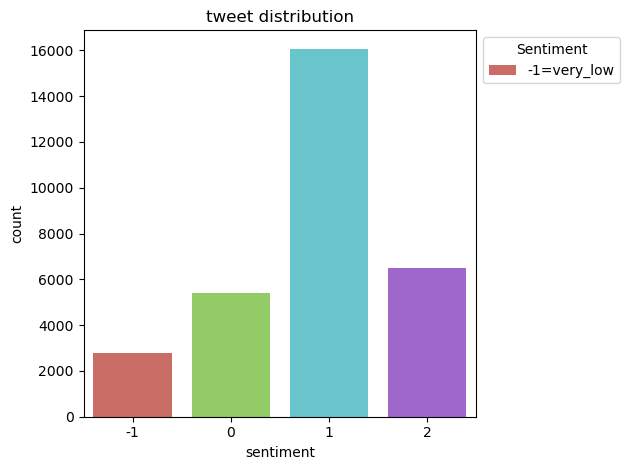

In [47]:
sns.countplot(x = 'sentiment', data = df_train, palette="hls")
plt.title("tweet distribution")
plt.legend(title="Sentiment", labels=["-1=very_low", "0=Low", "1=high", "2=very_high"], bbox_to_anchor=(1, 1), ncol=2)
plt.tight_layout()